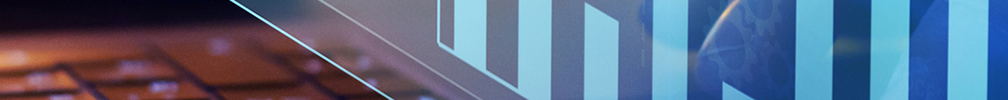

# Week 9 Overview
Last week, we explored how ensemble methods like Random Forests and Boosting enhance model accuracy by combining the strengths of multiple models. However, while these techniques improve performance, they often involve using hundreds or even thousands of individual models, making it difficult to understand how the overall predictions are made. This week, we’ll tackle this new challenge by focusing on variable importance measures, aiming to understand not just what the model predicts, but why. We’ll examine how ensemble methods can help reveal which features play a key role in the model’s decisions, making complex models more interpretable and guiding better decision-making.

### Key Terms
- Variable Importance: A metric quantifying how much each feature contributes to the predictive performance of a machine learning model
- Feature Selection: The process of choosing a subset of relevant features for model building, often guided by variable importance measures
- Traditional Variable Importance: Measures importance by evaluating the reduction in an error metric when a feature is used in decision tree splits, often biased toward high-cardinality features
- Permutation Importance: Evaluates feature importance by measuring the change in model performance when the values of a feature are randomly shuffled, providing an unbiased estimate
- Error Reduction: A traditional importance measure that calculates how much a feature decreases the prediction error in tree-based models
- Model-Agnostic: A characteristic of a method, such as permutation importance, that allows it to be applied across different types of machine learning models
- Baseline Performance: The initial predictive performance of a model before any modifications, used for comparison in permutation importance
- Bias in Variable Importance: Systematic errors in feature importance rankings caused by methods favoring features with specific characteristics, such as many unique values or strong correlations with other features
- Feature Interaction Effects: Situations where the combined influence of two or more features on the target variable is greater than the sum of their individual contributions

## Lesson 9.1: Variable Importance Measures
Ensemble methods like Random Forests and Boosting are state-of-the-art for many data science tasks, especially when working with structured data. They excel at capturing complex relationships between features with minimal feature engineering, making them highly effective and adaptable. Boosting algorithms such as XGBoost, LightGBM, and CatBoost frequently dominate Kaggle competitions due to their robust performance, scalability with large datasets, and versatility.

However, these performance gains often come at the cost of interpretability. In practice, stakeholders need to understand the key drivers behind model decisions, especially in fields like healthcare, finance, and real estate, where transparency and trust are crucial. Variable importance measures help bridge this gap, offering a way to interpret complex models by identifying which features contribute most to the predictions, enhancing trust and explainability.

### Definition:
A **variable importance measure** is a metric that quantifies how much each feature contributes to the predictive performance of a machine learning model.

### Example
The Kaggle Titanic Dataset records information on 1,355 passengers aboard the Titanic, including features such as:
- Survival (0 or 1)
- Ticket class (1st, 2nd, or 3rd)
- Gender
- Age
- Number of siblings/spouses
- Number of parents/children
- Ticket number, cabin, and port of embarkation

Without detailed analysis, you might predict that factors like gender and age would be important, perhaps expecting the "women and children first" rule to influence survival. A precise analysis confirms this, but unfortunately, it also reveals that ticket class was the second most important factor—slightly more significant than age. (The diagram below highlights the seven most important features.)

<center><img src="/Users/petershmorhun/Desktop/BU - Spring 25/machine_learning_fundamentals/images/bu-mod3-9.1lesson-figure1.png"></center>


By understanding and applying variable importance measures, you can interpret and validate complex models, ensuring their predictions are not only accurate but also explainable and trustworthy.

As usual, we need quantitative measures to drive this process. In upcoming lessons, we will consider two of the most common measures.

## 9.2 Lesson: Error Reduction
This traditional metric is calculated by measuring how much a feature reduces an error metric when used for splits in decision trees. In ensemble methods like Random Forests, this is averaged across all trees.

### Algorithm
For each `feature_j`:

    Importance(`feature_j`) = 0

For each tree in the ensemble:

    `total_error_reduction` = 0

    For each split in the tree:

        If split uses feature `feature_j`:

            `error_reduction` = error before split - error after split

            `total_error_reduction` += `error_reduction`

            Importance(`feature_j`) = Importance(`feature_j`) + `error_reduction`

For each feature_j:

    Importance(`feature_j`) = Importance(`feature_j`) / `total_error_reduction`

Error reduction provides a straightforward way to quantify how useful a feature is in reducing prediction errors, and it’s easily integrated into the training process of tree-based models. It is useful for quick assessments, as it can quickly highlight the most useful features, guiding decisions on model optimization and feature selection.

However, there are considerable **disadvantages**. 
- Bias Toward High-Cardinality Features: Features with many unique values (like ID numbers) are more likely to reduce error when used for splits, leading to inflated importance scores, even if the feature doesn’t truly improve the model’s predictive power, resulting in misleading interpretations
- Specific to Tree-Based Models: This method is most relevant for decision trees and tree-based ensembles and does not generalize to other types of models
- May Not Reflect True Generalization: Since error reduction is calculated on the training set, it does not accurately measure the importance of individual features in contributing to prediction performance on new, unseen data–the most critical factor in assessing model performance!

### Think About It
- Why might features with many unique values (e.g., IDs or timestamps) appear to have high importance when using error reduction as the metric? What steps could you take to address this bias in a tree-based model?
- Error reduction is calculated based on the training set. How could this lead to misleading feature importance scores when evaluating performance on unseen data? Can you think of alternative approaches to assess feature importance that better reflect generalization?

## 9.3 Lesson: Permutation Importance
Permutation importance involves measuring the change in model performance when the values of a feature are randomly shuffled. By disrupting the relationship between the feature and the target variable, this method tests how much the feature contributes to the model’s prediction performance. If shuffling a feature leads to a significant drop in performance, it indicates that the feature is important. This provides a more realistic and unbiased assessment of feature importance because it directly measures how much each feature affects predictions across different datasets.

### Algorithm
1. Compute Baseline Performance
- Train the model using the original dataset
- Measure and save the baseline performance (`baseline`)
2. For each feature (`feature_j`):
- Randomly shuffle the values of `feature_j` across all data points, creating a new dataset.
- Use the modified dataset to make new predictions with the model.
- Measure the performance (`shuffled_score`) on the modified dataset.
- Calculate the importance of `feature_j` using one of:
    - Difference: `importance_j = baseline - shuffled_score`
    - Ratio: `importance_j = shuffled_score / baseline`
3. Repeat for All Features:
- Repeat steps 2.a to 2.d for each feature to get a measure of how important each one is.
4. Interpret results:
    - Features with a larger drop in performance (greater `importance_j`) are more critical for the model.
5. Optional: repeat the shuffling process multiple times of reach feature and average the results to account for randomness. 

#### Advantages of this technique:
- First, it is more reliable because it captures the feature’s true contribution to the model’s performance, avoiding biases from high-cardinality features. 
- Second, it is model-agnostic, meaning it can be used with any machine learning algorithm, not just tree-based models. 
- Finally, it can be used on out-of-bag data, validation sets, or testing sets, providing a more realistic and generalizable measure of feature importance. 

#### Disadvantages
- The main disadvantage of permutation importance is that it is computationally expensive, especially for large datasets or complex models, as it requires re-evaluating the model multiple times. 
- Additionally, it may be sensitive to correlations between features, leading to potential underestimation of the importance of correlated features.

The following figure shows the Titanic data using permutation importance on three different types of ML classification models. The shuffling process was repeated 10 times, and the results were averaged. 


<center><img src="/Users/petershmorhun/Desktop/BU - Spring 25/machine_learning_fundamentals/images/bu-mod3-9.3lesson-figure1.png"></center>


### Think About It
- How might understanding variable importance impact decision-making in a real-world scenario, like approving loans or diagnosing a medical condition?
- What challenges might arise when explaining the importance of certain features in a complex model to a non-technical audience? How could variable importance measures help overcome these challenges?
- Why might a feature that appears important in one dataset be less important in another when using permutation-based importance measures?
- What are the advantages of permutation-based measures over traditional importance measures when detecting feature interaction effects?
